<a href="https://colab.research.google.com/github/geoffrey546/jet_engine_analysis/blob/main/Jet_engine_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving thermo_data.xls to thermo_data.xls


In [4]:
df = pd.read_excel('thermo_data.xls')


In [5]:
df

,Time (sec),T1 (C),T2 (C),T3 (C),T4 (C),T5 (C),P1 (kPa),P2 (kPa),P3 (kPa),P4 (kPa),P5 (kPa),Fuel Flow (L/hr),N1 (RPM),Thrust (N)
0,154.902,22.909,30.349,759.887,709.959,135.177,0.854,52.037,51.664,6.955,3.758,10.174,40457.919,27.084
1,155.164,23.012,30.353,762.578,714.228,143.606,0.606,54.585,53.920,6.977,3.809,10.175,42967.271,28.246
2,155.410,23.272,31.013,764.753,717.635,152.427,0.655,56.210,55.517,7.104,3.949,10.188,43137.781,28.646
3,155.644,23.447,31.578,765.703,720.376,160.006,0.670,58.407,57.602,7.349,3.994,10.191,45859.344,29.787
4,155.860,23.462,32.121,764.780,722.325,168.130,0.692,62.407,61.702,7.814,4.233,10.213,45863.837,29.441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,391.720,21.631,193.594,665.661,640.798,360.438,0.726,49.834,48.759,6.809,3.151,10.412,46597.399,32.199
1063,391.920,21.509,192.820,667.572,641.747,360.277,0.718,50.645,49.439,6.853,3.210,10.411,46602.446,31.020
1064,392.120,21.549,192.117,667.832,642.603,360.395,0.728,50.143,49.057,6.775,3.129,10.420,46598.271,31.969
1065,392.320,21.606,191.476,669.089,643.553,359.962,0.726,50.594,49.409,6.833,3.145,10.412,46599.742,31.848


In [6]:
time = df['Time (sec)']

In [7]:
compression_inlet_t = df['T1 (C)']
print(compression_inlet_t.max(),compression_inlet_t.min())

25.883 19.961


In [8]:
compression_outlet_t = df['T2 (C)']
print(compression_outlet_t.max(),compression_outlet_t.min())

223.691 30.349


In [9]:
turbine_inlet_t = df['T3 (C)']
print(turbine_inlet_t[7])

757.752


In [10]:
turbine_outlet_t = df['T4 (C)']
print(turbine_outlet_t[669])
print(turbine_inlet_t[669] - turbine_outlet_t[669] )

657.117
86.35200000000009


In [11]:
T3_avg = sum(turbine_inlet_t)/len(turbine_inlet_t)
T4_avg = sum(turbine_outlet_t)/len(turbine_outlet_t)

In [12]:
diff = T3_avg - T4_avg
print(diff)

80.66282286785452


In [13]:
nozzle_exit_t = df['T5 (C)']

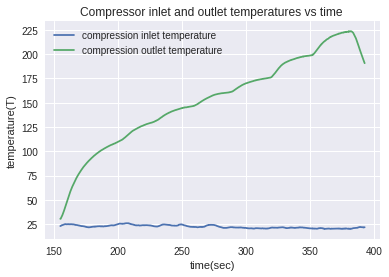

In [14]:
#plotting compression inlet(T1) and outlet temperatures(T2) vs time
fig_compression, axes_compression = plt.subplots()
axes_compression.plot(time,compression_inlet_t,label='compression inlet temperature')
axes_compression.plot(time,compression_outlet_t,label='compression outlet temperature')
axes_compression.set_xlabel('time(sec)')
axes_compression.set_ylabel('temperature(T)')
axes_compression.set_title('Compressor inlet and outlet temperatures vs time ')
axes_compression.legend()
fig_compression.savefig("compression.png", dpi=500)

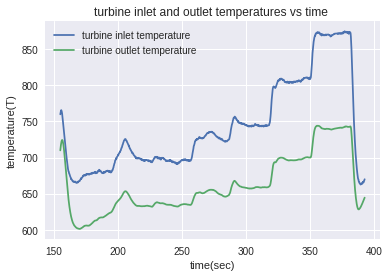

In [15]:
#plotting turbine inlet(T1) and outlet temperatures(T2) vs time
fig_turbine, axes_turbine = plt.subplots()
axes_turbine.plot(time,turbine_inlet_t,label='turbine inlet temperature')
axes_turbine.plot(time,turbine_outlet_t,label='turbine outlet temperature')
axes_turbine.set_xlabel('time(sec)')
axes_turbine.set_ylabel('temperature(T)')
axes_turbine.set_title('turbine inlet and outlet temperatures vs time ')
axes_turbine.legend()
fig_turbine.savefig("turbine1.png", dpi=500)

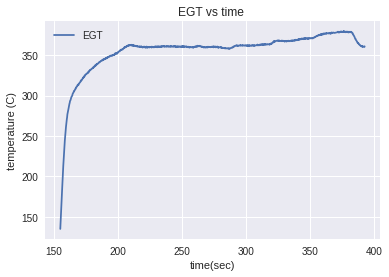

In [16]:
#plotting EGT vs time
fig_nozzle, axes_nozzle = plt.subplots()
axes_nozzle.plot(time,nozzle_exit_t,label='EGT')
axes_nozzle.set_xlabel('time(sec)')
axes_nozzle.set_ylabel('temperature (C)')
axes_nozzle.set_title('EGT vs time ')
axes_nozzle.legend()
fig_nozzle.savefig("nozzle.png", dpi=500)

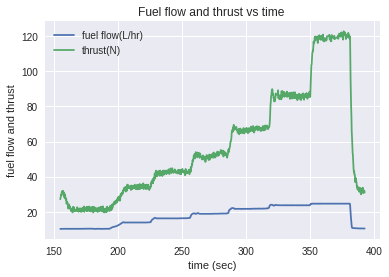

In [17]:
#fuel flow and thrust vs time
fuel_flow = df['Fuel Flow  (L/hr)']
thrust = df['Thrust (N)']
fig_flow_thrust, axes_flow_thrust = plt.subplots()
axes_flow_thrust.plot(time,fuel_flow,label='fuel flow(L/hr)')
axes_flow_thrust.plot(time,thrust,label='thrust(N)')
axes_flow_thrust.set_xlabel('time (sec)')
axes_flow_thrust.set_ylabel('fuel flow and thrust')
axes_flow_thrust.set_title('Fuel flow and thrust vs time ')
axes_flow_thrust.legend()
fig_flow_thrust.savefig("flow_thrus_time.png", dpi=500)

Text(0.5, 1.0, 'T-s diagram of the cycle ')

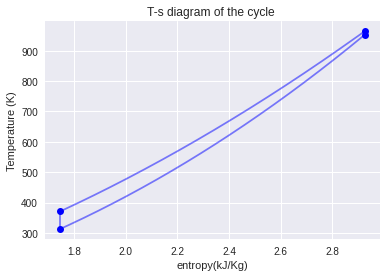

In [22]:
s1 = 1.74620344
s2 = s1
s3 = 2.9260887
s4 = s3
T1 = 313.49 
T2 = 371.42 
T3 = 964.111
T4 = 952.427
fig_ts, axes_ts = plt.subplots()
axes_ts.plot(s1,T1,'bo')
s = np.geomspace(s1,s2,500)
T = np.geomspace(T1,T2,500)
axes_ts.plot(s,T,'b',alpha = 0.5)

axes_ts.plot(s2,T2,'bo')
s = np.geomspace(s2,s3,500)
T = np.geomspace(T2,T3,500)
axes_ts.plot(s,T,'b',alpha = 0.5)

axes_ts.plot(s3,T3,'bo')
s = np.geomspace(s3,s4,500)
T = np.geomspace(T3,T4,500)
axes_ts.plot(s,T,'b',alpha = 0.5)

axes_ts.plot(s4,T4,'bo')
s = np.geomspace(s4,s1,500)
T = np.geomspace(T4,T1,500)
axes_ts.plot(s,T,'b',alpha = 0.5)

axes_ts.set_xlabel('entropy(kJ/Kg)')
axes_ts.set_ylabel('Temperature (K)')
axes_ts.set_title('T-s diagram of the cycle ')

Text(0.5, 1.0, 'P-v diagram of the cycle ')

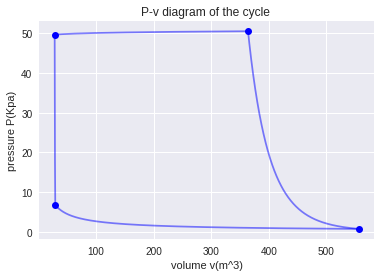

In [24]:
p1 = 0.706 
p2 = 50.531 
p3 = 49.667 
p4 = 6.733
v1 = 556.595
v2 = 363.8204
v3 = 28.056815
v4 = 29.089143
fig_pv, axes_pv = plt.subplots()
axes_pv.plot(v1,p1,'bo')
p = np.geomspace(p1,p2,500)
v = np.geomspace(v1,v2,500)
axes_pv.plot(v,p,'b',alpha=0.5)

axes_pv.plot(v2,p2,'bo')
p = np.geomspace(p2,p3,500)
v = np.geomspace(v2,v3,500)
axes_pv.plot(v,p,'b',alpha=0.5)

axes_pv.plot(v3,p3,'bo')
p = np.geomspace(p3,p4,500)
v = np.geomspace(v3,v4,500)
axes_pv.plot(v,p,'b',alpha=0.5)

axes_pv.plot(v4,p4,'bo')
p = np.geomspace(p4,p1,500)
v = np.geomspace(v4,v1,500)
axes_pv.plot(v,p,'b',alpha=0.5)

axes_pv.set_xlabel('volume v(m^3)')
axes_pv.set_ylabel('pressure P(Kpa)')
axes_pv.set_title('P-v diagram of the cycle ')